In [31]:
import os
import numpy as np
import netCDF4
from matplotlib import pyplot as plt

from py_box_model.box_model_args import (
    BoxModelBoxDimensions,
    BoxModelInitConditions,
    BoxModelTimeStep,
    BoxModelParameters
)
from py_box_model.box_model import box_model

In [8]:
path_to_data = os.path.join("/Users", "ashcrcc1", "Library", "CloudStorage", "Box-Box", "JHU and APL Team",
                            "Milestone 3 - due April 13", "data")
cems2_data_nc = "boxBHISTcmip6LE2-1001-001-188001-188912.nc"

In [9]:
root_group = netCDF4.Dataset(os.path.join(path_to_data, cems2_data_nc), 'r+')

In [13]:
root_group

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    creation_date: 01-Apr-2022 10:49:20
    model: CESM2 1 Degree Global Model for CMIP
    box_limits: 54S 45-65N 200m
    box_params: Agm=3000,Aredi=600,Kv=0.16e-4,epsilon=1.4e-4
    dimensions(sizes): time(120), box(4), latNorth(2)
    variables(dimensions): float64 time(time), float64 box(box), float64 latNorth(latNorth), float64 temperature(time, box), float64 salinity(time, box), float64 density(time, box), float64 AMOC(time), float64 Ekman(time), float64 deepwaterS(time), float64 Fws(time), float64 Fwn(time, latNorth), float64 Dlow(time)
    groups: 

In [29]:
root_group['box']

<class 'netCDF4._netCDF4.Variable'>
float64 box(box)
    long_name: box order N S L D
unlimited dimensions: 
current shape = (4,)
filling on, default _FillValue of 9.969209968386869e+36 used

In [28]:
root_group['salinity'][:].shape

(120, 4)

In [24]:
for v in root_group.variables:
    print(v)

time
box
latNorth
temperature
salinity
density
AMOC
Ekman
deepwaterS
Fws
Fwn
Dlow


In [50]:
# step-wise variables
D_low0 = root_group['Dlow'][0].data
S_north0, S_south0, S_low0, S_deep0 = root_group['salinity'][0]
T_north0, T_south0, T_low0, T_deep0 = root_group['temperature'][0]
M_ek = root_group['Ekman'][0].data
M_SD = root_group['deepwaterS'][0].data
Fwn = root_group['Fwn'][0].data[0] - root_group['Fwn'][0].data[0]
Fws = root_group['Fws'][0].data

# AMOC = M_n

box_dims = BoxModelBoxDimensions(D_high=200)
init_conditions = BoxModelInitConditions(D_low0=D_low0,
                                         S_north0=S_north0, S_south0=S_south0, S_low0=S_low0, S_deep0=S_deep0,
                                         T_north0=S_north0, T_south0=S_south0, T_low0=S_low0, T_deep0=S_deep0
                                         )
box_params = BoxModelParameters(K_v=0.16e-4, A_GM=3000, A_Redi=600, epsilon=1.4e-4,
                                Fws=Fws, Fwn=Fwn, M_ek=M_ek, M_SD=M_SD)
box_ts = BoxModelTimeStep(n_steps=120, time_step_size_in_years=(1/12))

In [55]:
# print('dims:', box_dims.to_dict())
# print('init:', init_conditions.to_dict())
# print('params:', box_params.to_dict())
# print('ts:', box_ts.to_dict())

results = box_model(box_dims, init_conditions, box_params, box_ts)
M_n, M_upw, M_eddy, D_low, T, S, sigma0 = results.unpack()

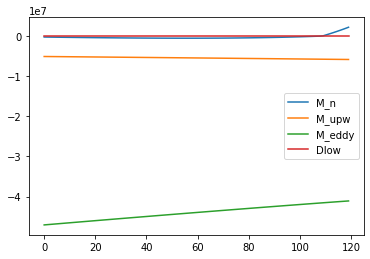

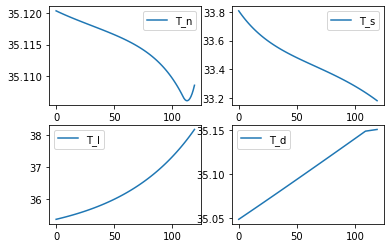

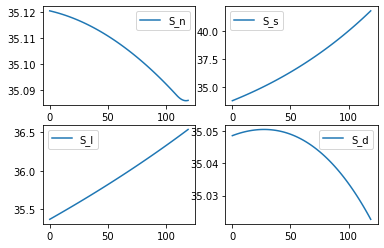

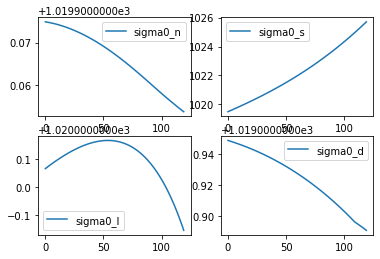

In [54]:
plt.plot(M_n, label='M_n')
plt.plot(M_upw, label='M_upw')
plt.plot(M_eddy, label='M_eddy')
plt.plot(D_low, label='Dlow')
plt.legend()
plt.show()
fig, ax = plt.subplots(nrows=2, ncols=2)
ax[0, 0].plot(T[0], label='T_n')
ax[0, 1].plot(T[1], label='T_s')
ax[1, 0].plot(T[2], label='T_l')
ax[1, 1].plot(T[3], label='T_d')
ax[0, 0].legend()
ax[0, 1].legend()
ax[1, 0].legend()
ax[1, 1].legend()
plt.show()
fig1, ax1 = plt.subplots(nrows=2, ncols=2)
ax1[0, 0].plot(S[0], label='S_n')
ax1[0, 1].plot(S[1], label='S_s')
ax1[1, 0].plot(S[2], label='S_l')
ax1[1, 1].plot(S[3], label='S_d')
ax1[0, 0].legend()
ax1[0, 1].legend()
ax1[1, 0].legend()
ax1[1, 1].legend()
plt.show()
fig2, ax2 = plt.subplots(nrows=2, ncols=2)
ax2[0, 0].plot(sigma0[0], label='sigma0_n')
ax2[0, 1].plot(sigma0[1], label='sigma0_s')
ax2[1, 0].plot(sigma0[2], label='sigma0_l')
ax2[1, 1].plot(sigma0[3], label='sigma0_d')
ax2[0, 0].legend()
ax2[0, 1].legend()
ax2[1, 0].legend()
ax2[1, 1].legend()
plt.show()